In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [58]:
%matplotlib inline

from pathlib import Path
import itertools

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from palmerpenguins import load_penguins

from matplottoy.data import iris
from matplottoy.encoders import color, position
from matplottoy.artists import point, bar, utils

spath = Path("../../../draft/figures/code/")

In [59]:
penguins = load_penguins()

In [60]:
penguins['species'].value_counts().reset_index()

,index,species
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


In [61]:
table = iris.DataFrame(penguins['species'].value_counts().reset_index())

In [62]:
fts = {'position':('index', position.Nominal({'Adelie': 0,  'Chinstrap': 1, 'Gentoo': 2})),  
        'length':('species', position.Identity()), 
        'facecolors': ('index', color.Categorical({'Adelie':'#FF8C00',
                                                'Gentoo':'#159090',
                                                'Chinstrap':'#A034F0'}))}

In [63]:
table.view()['index']

0       Adelie
1       Gentoo
2    Chinstrap
Name: index, dtype: object

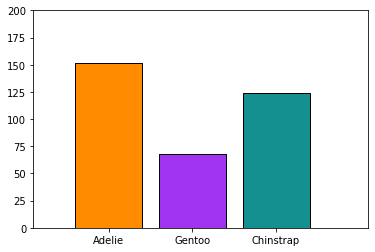

In [64]:
fig, ax = plt.subplots()

artistv = bar.Bar(table, fts, orientation='v')
ax.add_artist(artistv)
ax.set(xlim = (-0.5, 3.5), 
       ylim = (0,200),
       xticks = [.4, 1.4, 2.4],
       xticklabels = table.view(None)['index'])
fig.savefig(spath/"bar_v.png")

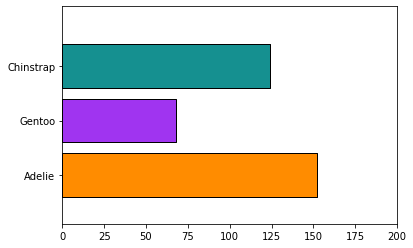

In [65]:
fig, ax = plt.subplots()

artisth = bar.Bar(table, fts, orientation='horizontal')
ax.add_artist(artisth)
ax.set(ylim = (-0.5, 3.5), 
       xlim = (0,200),
       yticks = [.4, 1.4, 2.4],
       yticklabels = table.view(None)['index'])
fig.savefig(spath/"bar_h.png")

# grouped bar

In [66]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [67]:
df = penguins.groupby(['island','species']).count()['sex'].reset_index()

In [68]:
tb = df.pivot(index=['island'], columns=['species'], values = 'sex').reset_index().fillna(0)

In [69]:
tb['Adelie_s'] = 'Adelie'
tb['Chinstrap_s'] = 'Chinstrap'
tb['Gentoo_s'] = 'Gentoo'

<AxesSubplot:>

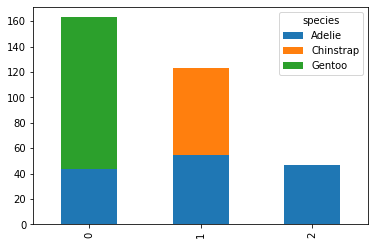

In [70]:
 df.pivot(index=['island'], columns=['species'], values = 'sex').reset_index().plot.bar(stacked=True)

In [71]:
bt = iris.DataFrame(tb)

In [72]:
bt.view()

species,island,Adelie,Chinstrap,Gentoo,Adelie_s,Chinstrap_s,Gentoo_s
0,Biscoe,44.0,0.0,119.0,Adelie,Chinstrap,Gentoo
1,Dream,55.0,68.0,0.0,Adelie,Chinstrap,Gentoo
2,Torgersen,47.0,0.0,0.0,Adelie,Chinstrap,Gentoo


In [73]:
cmap = color.Categorical({'Adelie':'#FF8C00', 'Gentoo':'#159090','Chinstrap':'#A034F0'})
gts = {'position': ('island', position.Nominal({'Biscoe':0, 'Dream':1, 'Torgersen':2}))}
mgts = {'length':(['Adelie', 'Chinstrap', 'Gentoo'], position.Identity()),
        'facecolors': (['Adelie_s', 'Chinstrap_s', 'Gentoo_s'], cmap)}
sgts = {'length':(['Adelie'], position.Identity()),
        'facecolors' :(['Adelie_s'], cmap)}

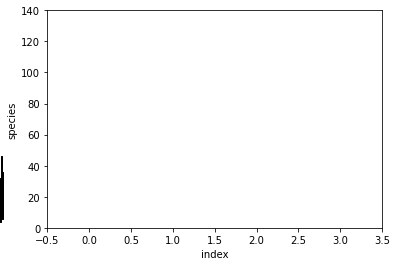

In [74]:
fig, ax = plt.subplots()
artists = bar.StackedBar(bt, gts, sgts)
ax.add_artist(artists)
_ = ax.set(ylim = (0, 140), 
       xlim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], )

In [75]:
artists.children[0]._paths

[Path(array([[ 0. , 44. ],
        [ 0. , 88. ],
        [ 0.8, 88. ],
        [ 0.8, 44. ],
        [ 0. , 44. ]]), array([ 1,  2,  2,  2, 79], dtype=uint8)),
 Path(array([[  1. ,  55. ],
        [  1. , 110. ],
        [  1.8, 110. ],
        [  1.8,  55. ],
        [  1. ,  55. ]]), array([ 1,  2,  2,  2, 79], dtype=uint8)),
 Path(array([[ 2. , 47. ],
        [ 2. , 94. ],
        [ 2.8, 94. ],
        [ 2.8, 47. ],
        [ 2. , 47. ]]), array([ 1,  2,  2,  2, 79], dtype=uint8))]

In [76]:
artist._paths[0].vertices

array([[  0. ,   0. ],
       [  0. ,   0.8],
       [152. ,   0.8],
       [152. ,   0. ],
       [  0. ,   0. ]])

In [77]:
artists.children[0]

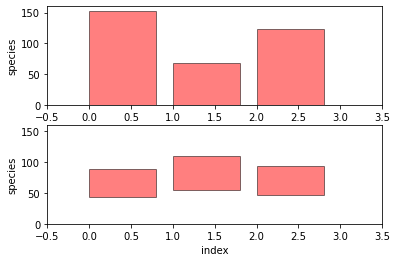

In [78]:
%matplotlib inline
import matplotlib.path as mpath
import matplotlib.patches as mpatches

fig, (ax1, ax2) = plt.subplots(nrows=2)
for a in artistv._paths:
    path = mpath.Path(a.vertices, a.codes)
    patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
    ax1.add_patch(patch)
_ = ax1.set(ylim = (0, 160), xlim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], )

for c in artists.children:
    for a in c._paths:
        path = mpath.Path(a.vertices, a.codes)
        patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
        ax2.add_patch(patch)

_ = ax2.set(ylim = (0, 160), xlim = (-.5, 3.5),   
            xlabel = fts['position'][0], ylabel = fts['length'][0], )